In [ ]:
# 'Hide input cells' feature - source code from http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_theme(style='darkgrid', 
              rc={'font.size' : 12, 'axes.titlesize' : 14, 'axes.labelsize': 13,
                  'xtick.labelsize' : 12, 'ytick.labelsize':12,
                  'legend.fontsize': 12, 'legend.title_fontsize': 12,
                  'axes.ymargin': .2 })

warnings.filterwarnings('ignore')

In [ ]:
# import data
csat = pd.read_excel('dataset/1_product_F_CSAT.xlsx')
srcA = pd.read_excel('dataset/2_main_data_source_A.xlsx')
srcB = pd.read_excel('dataset/3_main_data_source_B.xlsx')

# Explore Data

## Check duplicates and missing values

In [ ]:
# check duplicates in 3 datasets
print('Total duplicates in CSAT: %d' % csat.duplicated().sum())
print('Total duplicates in srcA: %d' % srcA.duplicated().sum())
print('Total duplicates in srcB: %d' % srcB.duplicated().sum())

print('\nTotal missing values in CSAT:\n', csat.isna().sum())
print('\nTotal missing values in srcA:\n', srcA.isna().sum())
print('\nTotal missing values in srcB:\n', srcB.isna().sum())

Total duplicates in CSAT: 493
Total duplicates in srcA: 758
Total duplicates in srcB: 1071

Total missing values in CSAT:
 prediction_id        0
comment_sentiment    0
polarity             0
dtype: int64

Total missing values in srcA:
 prediction_id                            0
cohortId                                 0
cohortName                               0
submittedAt                              0
timeTaken                                0
Recommend                                0
ftq_count                                0
total_words                              0
plagiarismTest                           0
profanityTest                            0
plagiarismType                           0
gender                                5117
hexaco_openness_general                  0
hexaco_humility_general                  0
hexaco_extraversion_general              0
hexaco_emotionality_general              0
hexaco_conscientiousness_general         0
hexaco_agreeableness_general    

## Check matched prediction_id in 3 data files
The datasets share the same variable prediciton_id. However, the total number of unique prediction_ids in 3 datasets is different, and there are some prediction_ids presenting in one dataset but not in others. Therefore, left join is used for data merging for consistency as source_B contains candidates with all the status.  

In [ ]:
id_srcB_srcA = srcB.prediction_id[srcB.prediction_id.isin(srcA.prediction_id)].unique()
id_srcB_csat = csat.prediction_id[csat.prediction_id.isin(srcB.prediction_id)].unique()
id_srcA_csat = csat.prediction_id[csat.prediction_id.isin(srcA.prediction_id)].unique()
id_csat_srcA_srcB = set(id_srcB_csat) & set(id_srcA_csat) 

In [ ]:
print('Total (unique) matched prediction_ids between\n\tsrcA and srcB: %d\n\tcsat and srcA: %d\n\tcsat and srcB: %d\n\tcsat, srcA and srcB: %d' %
      (id_srcB_srcA.size,id_srcA_csat.size,id_srcB_csat.size,len(id_csat_srcA_srcB)))
print('Total (unique) prediction_ids in\n\tCSAT: %d\n\tsrcA: %d\n\tsrcB: %d' % 
      (csat.prediction_id.unique().size,srcA.prediction_id.unique().size, srcB.prediction_id.unique().size))

Total (unique) matched prediction_ids between
	srcA and srcB: 7619
	csat and srcA: 6533
	csat and srcB: 6780
	csat, srcA and srcB: 6424
Total (unique) prediction_ids in
	CSAT: 8558
	srcA: 10963
	srcB: 11264


## CSAT

In [ ]:
csat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9051 entries, 0 to 9050
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prediction_id      9051 non-null   object 
 1   comment_sentiment  9051 non-null   object 
 2   polarity           9051 non-null   float64
dtypes: float64(1), object(2)
memory usage: 212.3+ KB


In [ ]:
csat.comment_sentiment.unique()

array(['Unknown Unknown Unknown', 'positive', 'neutral', 'negative'],
      dtype=object)

## Source A dataset

In [ ]:
srcA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11753 entries, 0 to 11752
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   prediction_id                       11753 non-null  object        
 1   cohortId                            11753 non-null  object        
 2   cohortName                          11753 non-null  object        
 3   submittedAt                         11753 non-null  datetime64[ns]
 4   timeTaken                           11753 non-null  float64       
 5   Recommend                           11753 non-null  object        
 6   ftq_count                           11753 non-null  int64         
 7   total_words                         11753 non-null  int64         
 8   plagiarismTest                      11753 non-null  int64         
 9   profanityTest                       11753 non-null  int64         
 10  plagiarismType        

In [ ]:
srcA.gender.unique()

array(['female', 'male', nan, 'predictionNA'], dtype=object)

In [ ]:
srcA.easl.unique()

array(['NOT_GIVEN', nan, 'No other language spoken', 'Hindi', 'Italian',
       'Japanese', 'French', 'Nepali', 'Afrikaans', 'Samoan', 'Gujarati',
       'Bengali', 'Spanish', 'German', 'Bosnian', 'Cantonese', 'Malay',
       'Arabic', 'AUSLAN', 'Mandarin', 'Maori', 'Punjabi', 'Croatian',
       'Indonesian', 'Thai', 'Greek', 'Burmese', 'Dutch', 'Hebrew',
       'Vietnamese', 'Turkish', 'Farsi', 'Korean', 'Swahili', 'Tongan',
       'Portuguese', 'Russian', 'Romanian', 'Serbian', 'Catalan',
       'Swedish', 'Armenian', 'Polish', 'Danish', 'Albanian', 'Hungarian',
       'Czech', 'Norwegian', 'Flemish', 'Welsh', 'Bulgarian', 'Finnish',
       'Somali', 'Kazakh'], dtype=object)

In [ ]:
srcA.plagiarismType.unique()

array(['NONE', 'NEGATIVE', 'SELF_PLAGIARISM', 'TRUE_POSITIVE'],
      dtype=object)

In [ ]:
srcA.Recommend.unique()

array(['YES', 'MAYBE', 'NO'], dtype=object)

## Source B dataset

In [ ]:
srcB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13962 entries, 0 to 13961
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   prediction_id                        12052 non-null  object        
 1   cohortId                             12052 non-null  object        
 2   submittedAt                          12052 non-null  datetime64[ns]
 3   customerSatisfaction_score           12032 non-null  float64       
 4   createdAt                            12318 non-null  object        
 5   updatedAt                            12318 non-null  object        
 6   status                               12318 non-null  object        
 7   candidateId                          13934 non-null  float64       
 8   jobId                                13935 non-null  float64       
 9   recruiter_id                         10973 non-null  float64       
 10  job_publis

In [ ]:
srcB.recommend.unique()

array(['No', 'Yes', 'Maybe', nan], dtype=object)

In [ ]:
srcB.status.unique()

array(['completed', 'dropped out', nan, 'active'], dtype=object)

# Merge data
Source B merge Source A with left join on 3 variables: prediciton_id, cohortId and submittedAt, then merge CSAT on variables prediction_id.


In [ ]:
mergedDF = pd.merge(srcB,srcA,how='left',on=['prediction_id','cohortId','submittedAt'])
mergedDF = pd.merge(mergedDF,csat,how='left',on='prediction_id')
mergedDF.rename(columns={'recommend':'recommend_fb'},inplace=True)

#Preprocessing

In [ ]:
mergedDF.drop_duplicates(keep='first',inplace=True)

In [ ]:
mergedDF.comment_sentiment.replace({'Unknown Unknown Unknown':'unknown'},inplace=True)

mergedDF.dropna(subset=['status','candidateId'],inplace=True)
mergedDF.drop(columns=['cohortId','cohortName','jobId','plagiarismTest','profanityTest','gender','easl','recommend_fb'],inplace=True)

Candidate ID has nearly 3000 records which is abnormal. Therefore, it is excluded from this analysis for further investigation.

In [ ]:
mergedDF.candidateId.value_counts()

0.0            2869
877861479.0       3
872124503.0       3
868949183.0       3
871429977.0       3
               ... 
866860842.0       1
581649334.0       1
864682427.0       1
732646077.0       1
864165227.0       1
Name: candidateId, Length: 8610, dtype: int64

In [ ]:
# correct data type
mergedDF.candidateId = mergedDF.candidateId.astype('Int64')
mergedDF.recruiter_id = mergedDF.recruiter_id.astype('Int64')

mergedDF.candidateId = mergedDF.candidateId.astype(str)
mergedDF.recruiter_id = mergedDF.recruiter_id.astype(str)

In [ ]:
mergedDF.columns

Index(['prediction_id', 'submittedAt', 'customerSatisfaction_score',
       'createdAt', 'updatedAt', 'status', 'candidateId', 'recruiter_id',
       'job_publish_date', 'job_close_date', 'job_title',
       'customerSatisfaction_comment_length', 'timeTaken', 'Recommend',
       'ftq_count', 'total_words', 'plagiarismType', 'hexaco_openness_general',
       'hexaco_humility_general', 'hexaco_extraversion_general',
       'hexaco_emotionality_general', 'hexaco_conscientiousness_general',
       'hexaco_agreeableness_general', 'trait_team_player_percentile',
       'trait_self_aware_percentile', 'trait_resourceful_percentile',
       'trait_drive_percentile', 'trait_critical_thinking_percentile',
       'trait_accountability_percentile', 'comment_sentiment', 'polarity'],
      dtype='object')

In [ ]:
cols = ['prediction_id', 'candidateId', 'status', 'submittedAt', 'createdAt', 'updatedAt',  
        'customerSatisfaction_score', 'customerSatisfaction_comment_length',
        'comment_sentiment', 'polarity', 'job_publish_date', 'job_close_date',
        'recruiter_id','job_title','timeTaken', 'Recommend',
       'ftq_count', 'total_words', 'plagiarismType', 'hexaco_openness_general',
       'hexaco_humility_general', 'hexaco_extraversion_general',
       'hexaco_emotionality_general', 'hexaco_conscientiousness_general',
       'hexaco_agreeableness_general', 'trait_team_player_percentile',
       'trait_self_aware_percentile', 'trait_resourceful_percentile',
       'trait_drive_percentile', 'trait_critical_thinking_percentile',
       'trait_accountability_percentile']

In [ ]:
df = mergedDF[cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11547 entries, 0 to 16349
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   prediction_id                        11282 non-null  object        
 1   candidateId                          11547 non-null  object        
 2   status                               11547 non-null  object        
 3   submittedAt                          11282 non-null  datetime64[ns]
 4   createdAt                            11547 non-null  object        
 5   updatedAt                            11547 non-null  object        
 6   customerSatisfaction_score           11265 non-null  float64       
 7   customerSatisfaction_comment_length  9927 non-null   float64       
 8   comment_sentiment                    6806 non-null   object        
 9   polarity                             6806 non-null   float64       
 10  job_publis

# Analysis

## Descriptive Statistics

In [ ]:
np.round(df.describe(),2)

,customerSatisfaction_score,customerSatisfaction_comment_length,polarity,timeTaken,ftq_count,total_words,hexaco_openness_general,hexaco_humility_general,hexaco_extraversion_general,hexaco_emotionality_general,hexaco_conscientiousness_general,hexaco_agreeableness_general,trait_team_player_percentile,trait_self_aware_percentile,trait_resourceful_percentile,trait_drive_percentile,trait_critical_thinking_percentile,trait_accountability_percentile
count,11265.00,9927.00,6806.00,7650.00,7650.00,7650.00,7650.00,7650.00,7650.00,7650.00,7650.00,7650.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,9.18,30.30,0.34,144.40,6.00,396.42,0.54,0.53,0.49,0.52,0.52,0.51,0.50,0.50,0.49,0.49,0.48,0.51
std,1.21,23.16,0.22,1286.25,0.02,127.89,0.08,0.10,0.08,0.04,0.10,0.07,0.29,0.29,0.29,0.29,0.28,0.29
min,0.00,0.00,-1.00,-12.41,5.00,6.00,0.21,0.26,0.30,0.35,0.30,0.34,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.00,15.00,0.20,23.66,6.00,309.00,0.49,0.47,0.44,0.49,0.47,0.47,0.25,0.25,0.24,0.25,0.24,0.26
50%,10.00,25.00,0.33,38.21,6.00,397.00,0.55,0.51,0.48,0.52,0.50,0.50,0.50,0.50,0.48,0.49,0.47,0.52
75%,10.00,40.00,0.48,63.22,6.00,482.00,0.59,0.56,0.52,0.55,0.54,0.54,0.75,0.75,0.74,0.75,0.72,0.76
max,10.00,284.00,1.00,67585.93,6.00,1486.00,0.77,0.87,0.79,0.70,0.87,0.79,1.00,1.00,1.00,1.00,1.00,1.00


## CSAT

- There is a total of 8471 records of customer satifaction score given by the candidates. High satisfaction scores (7 to 10) account for over 97% of the total feedbacks, indicating that the candidates have a good experience with FirstInterview.
- Positive sentiment dominates in the candidates' feedback which account for 88.38%. 10.36% of the feedbacks has neutral sentiment while negative feedbacks only accounts for 1.25% of the total feedback received from the candidates.
- Each sentiment has a wide range of polarity and satisfaction scores, which indicates that FirstInterview has some room for improvement. 

**Future** step: Overall, the candidates have positive experience with FirstInterview. However, this result may not completely accurate for not all the users rate the product and provide feedback. To understand why FirstInterview receives such a high positive feedback and how the product can be improved, it is necessary to futher investigate and analyse the detail of user comments. 

**Suggestion**: Client feedback is also important for product development. It would be great to know whether the outcome of FirstInterview meet the business expectation and requirement.

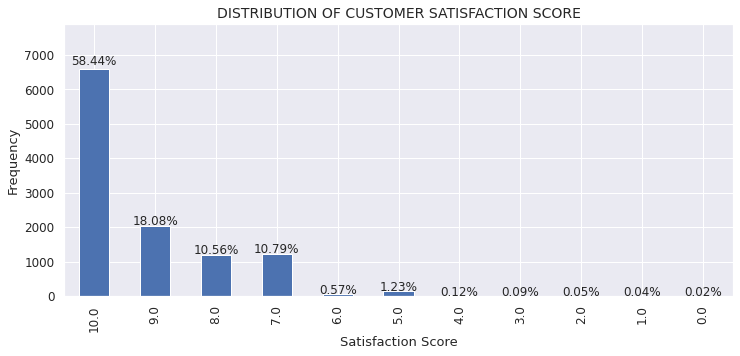

In [ ]:
satisfaction = df[df['customerSatisfaction_score']!= np.nan].customerSatisfaction_score.value_counts().sort_index(ascending=False)
total = sum(satisfaction)

ax = satisfaction.plot(kind='bar',figsize=(12,5),title='DISTRIBUTION OF CUSTOMER SATISFACTION SCORE')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    pct = height/total
    ax.annotate(f'{pct:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.ylabel('Frequency')
plt.xlabel('Satisfaction Score')
plt.plot();

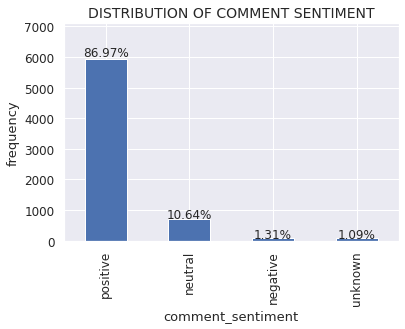

In [ ]:
sentiment = df.comment_sentiment.value_counts()
ax = sentiment.plot(kind='bar', title = 'DISTRIBUTION OF COMMENT SENTIMENT')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    total=sum(sentiment)
    pct = height/total
    ax.annotate(f'{pct:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.xlabel('comment_sentiment')
plt.ylabel('frequency')
plt.show();

### Satisfaction Score by Comment Sentiment

In [ ]:
sentiment_score = df.filter(items=['comment_sentiment','customerSatisfaction_score'])
sentiment_score.dropna(inplace=True)
bySentimentScore = np.round(sentiment_score.groupby('comment_sentiment').describe(),2).rename(columns={'count':'freq','25%':'q1','50%':'median','75%':'q3'})
bySentimentScore['customerSatisfaction_score','IQR'] = bySentimentScore.customerSatisfaction_score.q3 - bySentimentScore.customerSatisfaction_score.q1 
display(bySentimentScore)

customerSatisfaction_score              ...                 
                                        freq  mean   std  ...    q3   max  IQR
comment_sentiment                                         ...                 
negative                                89.0  8.18  1.79  ...  10.0  10.0  3.0
neutral                                724.0  8.72  1.38  ...  10.0  10.0  2.0
positive                              5919.0  9.23  1.18  ...  10.0  10.0  1.0
unknown                                 74.0  9.23  1.17  ...  10.0  10.0  1.0

[4 rows x 9 columns]

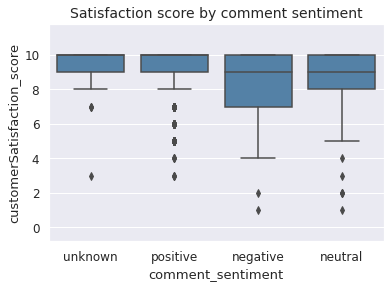

In [ ]:
ax = sns.boxplot(sentiment_score.comment_sentiment, sentiment_score.customerSatisfaction_score,color='steelblue')
ax.set_title('Satisfaction score by comment sentiment')
plt.show();

### Polarity by Comment Sentiment

In [ ]:
sentiment_polarity = df.filter(items=['comment_sentiment','polarity'])
bySentimentPolarity = np.round(sentiment_polarity.groupby('comment_sentiment').describe(),2).rename(columns={'count':'freq','25%':'q1','50%':'median','75%':'q3'})
bySentimentPolarity['polarity','IQR'] = bySentimentPolarity.polarity.q3 - bySentimentPolarity.polarity.q1 
display(bySentimentPolarity)

polarity                                                
                      freq  mean   std   min    q1 median    q3  max   IQR
comment_sentiment                                                         
negative              89.0 -0.03  0.30 -1.00 -0.20   0.00  0.14  1.0  0.34
neutral              724.0  0.14  0.21 -0.60  0.00   0.12  0.26  0.8  0.26
positive            5919.0  0.37  0.21 -0.63  0.23   0.35  0.50  1.0  0.27
unknown               74.0  0.39  0.21  0.00  0.20   0.41  0.50  1.0  0.30

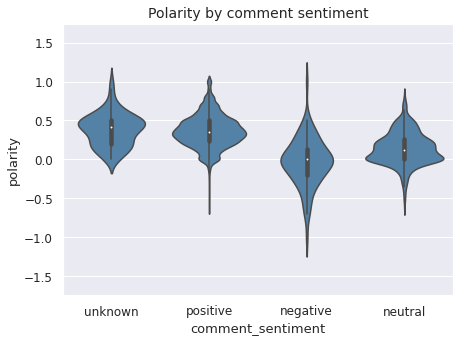

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.violinplot(df.comment_sentiment,df.polarity,color='steelblue')
ax.set_title('Polarity by comment sentiment')
plt.show();

### Comment Length by Satisfaction Score

In [ ]:
length_score = df.filter(items=['customerSatisfaction_comment_length','customerSatisfaction_score'])
byLengthScore = np.round(length_score.groupby('customerSatisfaction_score').describe(),2).rename(columns={'count':'freq','25%':'q1','50%':'median','75%':'q3'})
byLengthScore['customerSatisfaction_comment_length','IQR'] = byLengthScore.customerSatisfaction_comment_length.q3 - byLengthScore.customerSatisfaction_comment_length.q1 
display(byLengthScore)

customerSatisfaction_comment_length  ...       
                                                          freq  ...    IQR
customerSatisfaction_score                                      ...       
0.0                                                        1.0  ...   0.00
1.0                                                        4.0  ...  49.00
2.0                                                        4.0  ...   1.50
3.0                                                        7.0  ...   7.50
4.0                                                        9.0  ...  14.00
5.0                                                      130.0  ...  28.50
6.0                                                       54.0  ...  29.75
7.0                                                     1168.0  ...  25.00
8.0                                                      937.0  ...  23.00
9.0                                                     1735.0  ...  24.00
10.0                                                    5596.0  ...  25.00

[11 rows x 9 columns]

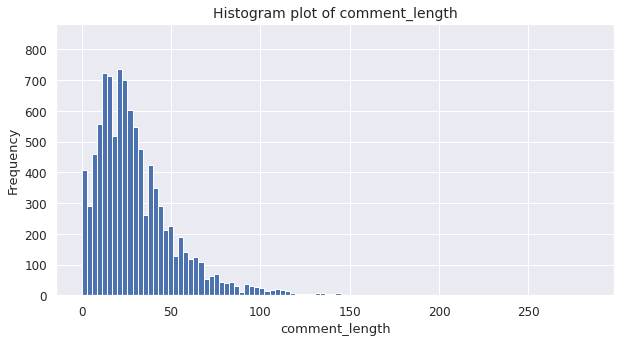

In [ ]:
df.customerSatisfaction_comment_length.plot(kind='hist',bins=100,
                      figsize=(10,5),title='Histogram plot of comment_length')
plt.xlabel('comment_length')
plt.show();

## Suitability Recommendation

### Remove the outliers

In [ ]:
res = df.dropna(subset=['Recommend'])
np.round(res.describe(),2)

,customerSatisfaction_score,customerSatisfaction_comment_length,polarity,timeTaken,ftq_count,total_words,hexaco_openness_general,hexaco_humility_general,hexaco_extraversion_general,hexaco_emotionality_general,hexaco_conscientiousness_general,hexaco_agreeableness_general,trait_team_player_percentile,trait_self_aware_percentile,trait_resourceful_percentile,trait_drive_percentile,trait_critical_thinking_percentile,trait_accountability_percentile
count,7640.00,6626.00,6455.00,7650.00,7650.00,7650.00,7650.00,7650.00,7650.00,7650.00,7650.00,7650.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,9.17,32.06,0.34,144.40,6.00,396.42,0.54,0.53,0.49,0.52,0.52,0.51,0.50,0.50,0.49,0.49,0.48,0.51
std,1.23,23.60,0.22,1286.25,0.02,127.89,0.08,0.10,0.08,0.04,0.10,0.07,0.29,0.29,0.29,0.29,0.28,0.29
min,1.00,0.00,-1.00,-12.41,5.00,6.00,0.21,0.26,0.30,0.35,0.30,0.34,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.00,16.00,0.20,23.66,6.00,309.00,0.49,0.47,0.44,0.49,0.47,0.47,0.25,0.25,0.24,0.25,0.24,0.26
50%,10.00,26.00,0.33,38.21,6.00,397.00,0.55,0.51,0.48,0.52,0.50,0.50,0.50,0.50,0.48,0.49,0.47,0.52
75%,10.00,42.00,0.48,63.22,6.00,482.00,0.59,0.56,0.52,0.55,0.54,0.54,0.75,0.75,0.74,0.75,0.72,0.76
max,10.00,284.00,1.00,67585.93,6.00,1486.00,0.77,0.87,0.79,0.70,0.87,0.79,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# identify a reasonal threshold for timeTaken and total_words
timeTaken_upper = res.timeTaken.quantile(q=0.95)
timeTaken_lower = res.timeTaken.quantile(q=0.01)

totalWords_upper = res.total_words.quantile(q=0.99)
totalWords_lower = res.total_words.quantile(q=0.0)

print('timeTaken:%.2f, %.2f ' % (timeTaken_lower, timeTaken_upper))
print('total_words: %.2f, %.2f' % (totalWords_lower, totalWords_upper))

timeTaken:6.69, 229.56 
total_words: 6.00, 736.00


In [ ]:
df_no_outliers = res[res['timeTaken']<=timeTaken_upper]
df_no_outliers = df_no_outliers[df_no_outliers['timeTaken']>=timeTaken_lower]

df_no_outliers = df_no_outliers[df_no_outliers['total_words']<=totalWords_upper]
df_no_outliers = df_no_outliers[df_no_outliers['total_words']>=totalWords_lower]

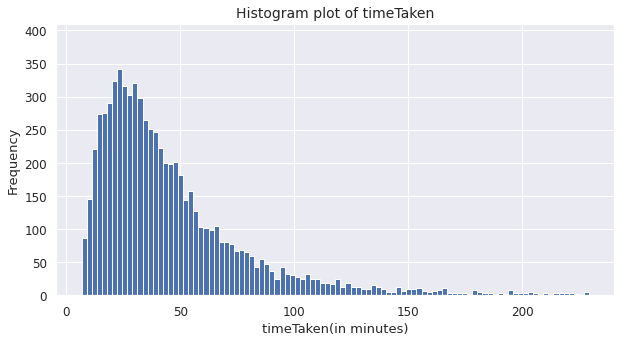

In [ ]:
df_no_outliers.timeTaken.plot(kind='hist',bins=100, 
                    title='Histogram plot of timeTaken',figsize=(10,5))
plt.xlabel('timeTaken(in minutes)')
plt.show();

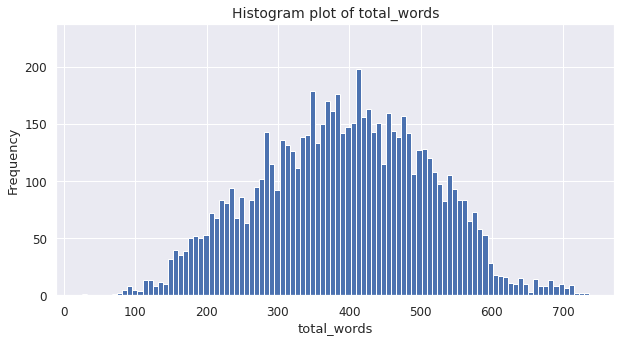

In [ ]:
df_no_outliers.total_words.plot(kind='hist',bins=100,
                      figsize=(10,5),title='Histogram plot of total_words')
plt.xlabel('total_words')
plt.show();

### Distribution of Suitability Recommendation
FirstInterview eliminates nearly 40% of the total candidates, which helps the recruiter to reduce the number of unfit applicants and speed up the hiring process significantly. 

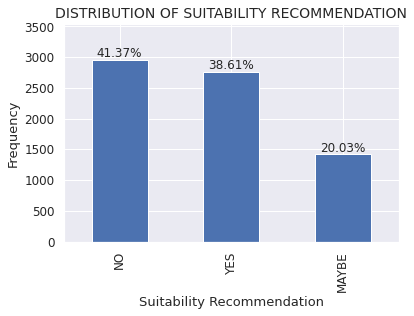

In [ ]:
recommendation_df = df_no_outliers.iloc[:,13:]
suitability_recommend = recommendation_df.Recommend.value_counts()
ax = suitability_recommend.plot(kind='bar', title='DISTRIBUTION OF SUITABILITY RECOMMENDATION')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    total=sum(suitability_recommend)
    pct = height/total
    ax.annotate(f'{pct:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.xlabel('Suitability Recommendation')
plt.ylabel('Frequency')
plt.show();

The statistics summary and correlation plot proves that the suitability recommendation given by PredictiveHive AI is unbiased. The recommendation is based on the assumption of  each job requiring different personal and behaviour traits beside the skill sets. Notice that there is a collapsed space in the data visualization, this is because the result is purely based on the traits and exclusive to the skills.

**Future step**: Analyse the suitability recommendation based on skill sets and other factors.

**Suggestion**: It would be great if there is data about successful candidates in FirstInterview got employed by the business so that we can show to the clients how helpful and successful FirstInterview is in hiring process beside speeding up the hiring process by reducing the number of applicants.  


In [ ]:
pd.set_option('display.max_rows', 400)
suitability_recommend = np.round(recommendation_df.groupby('Recommend').describe(),2)
suitability_recommend

timeTaken                             ... trait_accountability_percentile                       
              count   mean    std   min    25%  ...                             min   25%   50%   75%  max
Recommend                                       ...                                                       
MAYBE        1427.0  47.52  33.22  6.92  25.40  ...                            0.00  0.37  0.55  0.76  1.0
NO           2948.0  38.61  29.65  6.70  18.76  ...                            0.00  0.11  0.25  0.48  1.0
YES          2751.0  53.39  36.87  7.39  28.68  ...                            0.01  0.53  0.70  0.86  1.0

[3 rows x 120 columns]

### Suitability Recommendation by Job 65

In [ ]:
recommend_by_job = recommendation_df[recommendation_df['job_title']=='Job Listing Public Title 65']

In [ ]:
recommend_fa1 = recommend_by_job.filter(items=['hexaco_openness_general',
       'hexaco_humility_general', 'hexaco_extraversion_general',
       'hexaco_emotionality_general', 'hexaco_conscientiousness_general',
       'hexaco_agreeableness_general','Recommend'])

np.round(recommend_fa1.groupby('Recommend').describe(),2)

hexaco_openness_general                    ... hexaco_agreeableness_general                  
                            count  mean   std   min  ...                          25%   50%   75%   max
Recommend                                            ...                                               
MAYBE                       965.0  0.52  0.08  0.24  ...                         0.46  0.49  0.52  0.65
NO                         2038.0  0.53  0.08  0.22  ...                         0.45  0.48  0.51  0.66
YES                        1984.0  0.53  0.07  0.21  ...                         0.48  0.51  0.54  0.66

[3 rows x 48 columns]

In [ ]:
recommend_fa2 = recommend_by_job.filter(items=['trait_team_player_percentile',
       'trait_self_aware_percentile', 'trait_resourceful_percentile',
       'trait_drive_percentile', 'trait_critical_thinking_percentile',
       'trait_accountability_percentile','Recommend'])

np.round(recommend_fa2.groupby('Recommend').describe(),2)

trait_team_player_percentile                    ... trait_accountability_percentile                 
                                 count  mean   std   min  ...                             25%   50%   75%  max
Recommend                                                 ...                                                 
MAYBE                            965.0  0.51  0.26  0.01  ...                            0.37  0.54  0.74  1.0
NO                              2038.0  0.34  0.26  0.00  ...                            0.10  0.24  0.43  1.0
YES                             1984.0  0.65  0.24  0.02  ...                            0.53  0.71  0.87  1.0

[3 rows x 48 columns]

In [ ]:
ra1 = sns.PairGrid(recommend_fa1,hue='Recommend',height=4)
ra1.map_diag(sns.histplot)
ra1.map_offdiag(sns.scatterplot)
ra1.add_legend()
plt.show;

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ra2 = sns.PairGrid(recommend_fa2,hue='Recommend',height=4)
ra2.map_diag(sns.histplot)
ra2.map_offdiag(sns.scatterplot)
ra2.add_legend()
plt.show;

Output hidden; open in https://colab.research.google.com to view.

## Plagiarism
- Majority of the candidates do not plagiarise, reflecting nearly 82%. There is 16.26% undetermined while only 2% of candidates are identified as plagiarism.

-	There is an interesting insight about plagiarism. Most of the candidates who have significantly high value in their personality traits are undetermined in plagiarism.

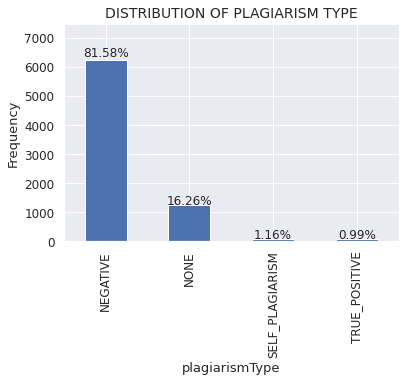

In [ ]:
plagiarism = df.plagiarismType.value_counts()
ax = plagiarism.plot(kind='bar',title = 'DISTRIBUTION OF PLAGIARISM TYPE')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    total=sum(plagiarism)
    pct = height/total
    ax.annotate(f'{pct:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.xlabel('plagiarismType')
plt.ylabel('Frequency')
plt.show();

In [ ]:
plagiarism_fa1 = df.filter(items=['hexaco_openness_general',
       'hexaco_humility_general', 'hexaco_extraversion_general',
       'hexaco_emotionality_general', 'hexaco_conscientiousness_general',
       'hexaco_agreeableness_general','plagiarismType'])

plagiarism_fa2 = df.filter(items=['trait_team_player_percentile',
       'trait_self_aware_percentile', 'trait_resourceful_percentile',
       'trait_drive_percentile', 'trait_critical_thinking_percentile',
       'trait_accountability_percentile','plagiarismType'])

In [ ]:
fa1 = sns.PairGrid(plagiarism_fa1,hue='plagiarismType',height=4)
fa1.map_diag(sns.histplot)
fa1.map_offdiag(sns.scatterplot)
fa1.add_legend()
plt.show;

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fa2 = sns.PairGrid(plagiarism_fa2,hue='plagiarismType',height=4)
fa2.map_diag(sns.histplot)
fa2.map_offdiag(sns.scatterplot)
fa2.add_legend()
plt.show;

Output hidden; open in https://colab.research.google.com to view.

## Dropout
In general, the proportion of dropout when candidates participated in FirstInterview is only 2.3% while the completion rate is 97.7%. However,	There is a certain number of recruiters and jobs having more dropouts compared to others.

**Suggestion**: The business needs to understand why the candidates dropped out by looking into their feedback.


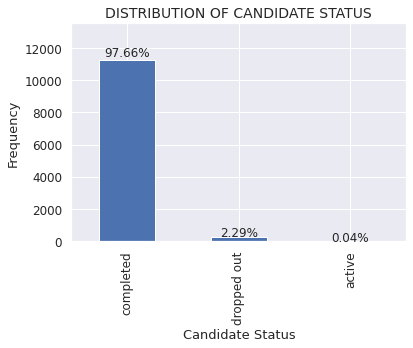

In [ ]:
status = df.status.value_counts()
ax = status.plot(kind='bar', title='DISTRIBUTION OF CANDIDATE STATUS')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    total=sum(status)
    pct = height/total
    ax.annotate(f'{pct:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.ylabel('Frequency')
plt.xlabel('Candidate Status')
plt.plot();

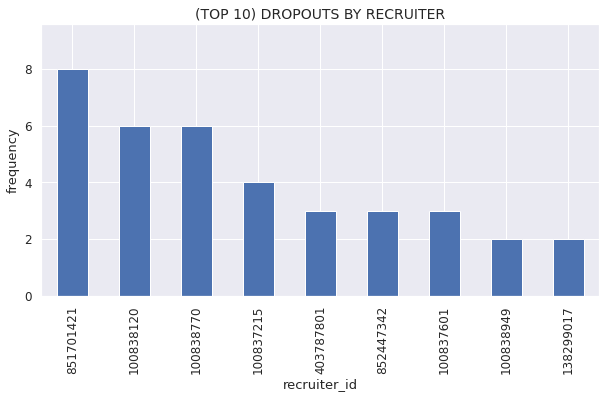

In [ ]:
dropouts_by_recruiter = df[df.status=='dropped out'].filter(items=['candidateId','recruiter_id'])
dropouts_by_recruiter = dropouts_by_recruiter.groupby('recruiter_id').count().sort_values(['candidateId'],ascending=False)
dropouts_by_recruiter.iloc[1:10].plot(kind='bar',use_index=True,legend=False,
                         figsize=(10,5),fontsize=12,ylabel = 'frequency',
                         title = '(TOP 10) DROPOUTS BY RECRUITER')
plt.show();

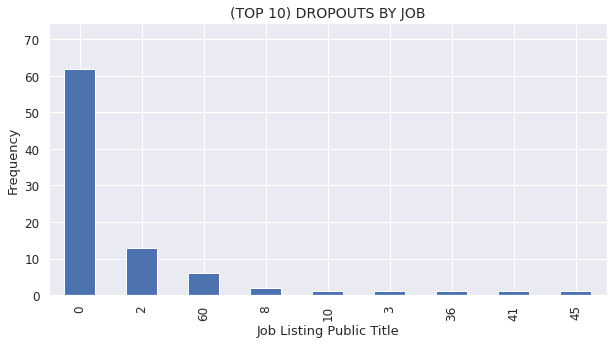

In [ ]:
dropouts_by_job = df[df.status=='dropped out'].filter(items=['candidateId','job_title'])
dropouts_by_job = dropouts_by_job.groupby('job_title').count().sort_values(['candidateId'],ascending=False)
dropouts_by_job.index = dropouts_by_job.index.str.extract('(\d+)')[0]

dropouts_by_job.iloc[1:10].plot(kind='bar',use_index=True,legend=False,
                         figsize=(10,5),fontsize=12,ylabel = 'Frequency',
                         title = '(TOP 10) DROPOUTS BY JOB')
plt.xlabel('Job Listing Public Title')
plt.show();

## Candidate Engagements

The job openning trend shows that the job market is active around mid May and September, which has a strong positive effect the candidate engagement. People are likely to apply for job in April and end of August. It is true especially for graduates who are desperate to look for employment after their study. However, only a certain number of jobs attract candidates to apply and not all the candidates completes their first round of interview. For instance, Job Listing Public Title 65, 0, 2, 8, 60 are the top 5 jobs having the most applications but there is approximately 25% of the candidates not completing their first interview.

**Suggestion**: Deep dive in user feedback to make improvement in product development to enhance the candidate engagements. 

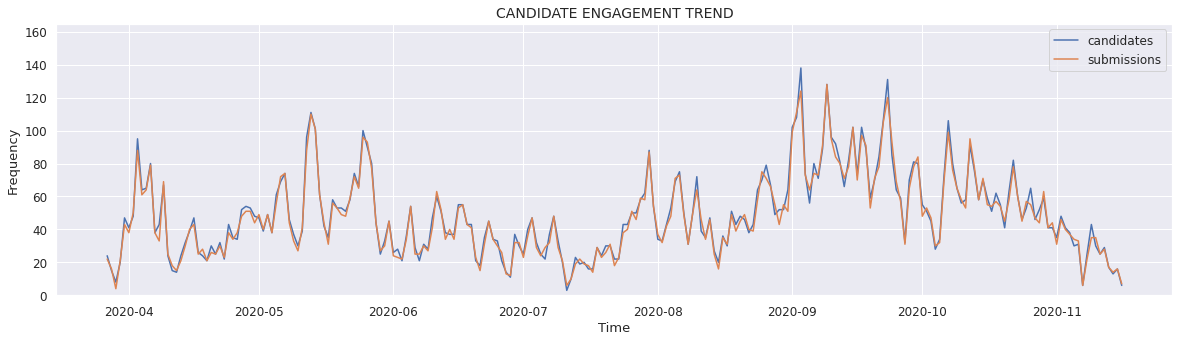

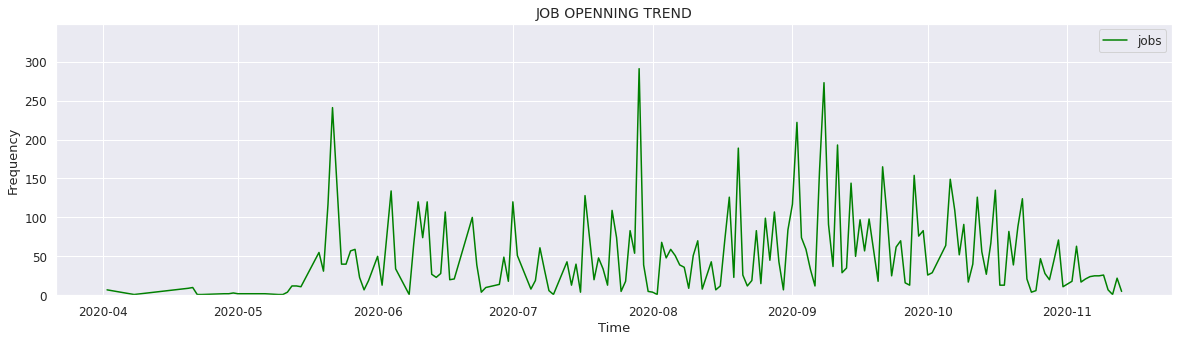

In [ ]:
profile_creation = df.filter(items=['candidateId','createdAt'])
profile_creation['createdAt'] = pd.to_datetime(profile_creation['createdAt']).dt.date
pc = profile_creation.groupby('createdAt').count()

submissions = df.filter(items=['prediction_id','submittedAt'])
submissions.dropna(inplace=True)
submissions['submittedAt'] = pd.to_datetime(submissions['submittedAt']).dt.date
sb = submissions.groupby('submittedAt').count()

openning = df.filter(items=['job_title','job_publish_date'])
openning.dropna(inplace=True)
openning['job_publish_date'] = pd.to_datetime(openning['job_publish_date']).dt.date
jo = openning.groupby('job_publish_date').count()

plt.figure(figsize=(20,5))
plt.plot(pc,label='candidates')
plt.plot(sb,label='submissions')
plt.ylim(0,)
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('CANDIDATE ENGAGEMENT TREND')
plt.legend()
plt.show();

plt.figure(figsize=(20,5))
plt.plot(jo,label='jobs',color='green')
plt.ylim(0,)
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('JOB OPENNING TREND')
plt.legend()
plt.show();

In [ ]:
submission_ratio = df.filter(items=['candidateId','Recommend','job_title']).groupby('job_title').count()
submission_ratio.rename(columns={'candidateId':'candidates','Recommend':'submissions'},inplace=True)
submission_ratio.index = submission_ratio.index.str.extract('(\d+)')[0]
submission_ratio.sort_values(by='candidates',ascending=False,inplace=True)

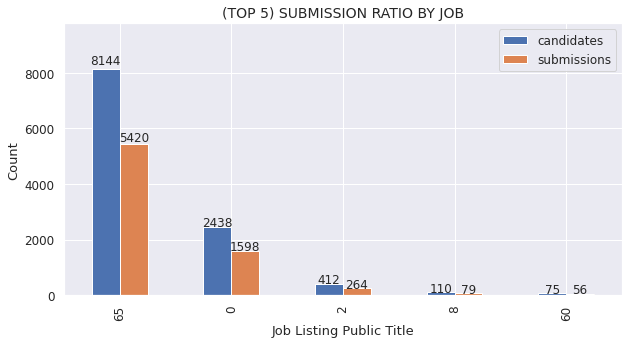

In [ ]:
ax = submission_ratio.iloc[:5,:].plot(kind='bar',stacked=False,figsize=(10,5),
                                 title='(TOP 5) SUBMISSION RATIO BY JOB')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

plt.xlabel('Job Listing Public Title')
plt.ylabel('Count')
plt.legend()
plt.show()